## **Chapter 5: Image-based Multi-class Classification**
This chapter continues our exploration of the following ideas.
- The use of **binary_crossentropy** loss function along with the **softmax activation function**
- The use of callbacks during model training
- Visualization of loss learning and accuracy learning curve

Additionally, the chapter introduces the following:
- Using a built-in image data from sklearn
- Pre-processing of image data for training
- Strategy for determining if we have enough training data to build a reliable model or if we need to acquire more data. 


### Do we need more data?

- Get a fraction of the training data determined by the size we are currently evaluating in the loop.
- Set the model weights to the initial_weights with set_weights() and train your model on the fraction of training data using early_stop as a callback.
- Evaluate and store the accuracy for the training fraction and the test set.
- Call plot_results() passing in the training and test accuracies for each training size.


In [16]:
from keras.api.layers import InputLayer, Dense
from keras.api.models import Sequential
from keras.api.utils import to_categorical
from keras.api.callbacks import EarlyStopping

import pandas as pd
import numpy as np



## **Import the dataset**

(1797, 8, 8)
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


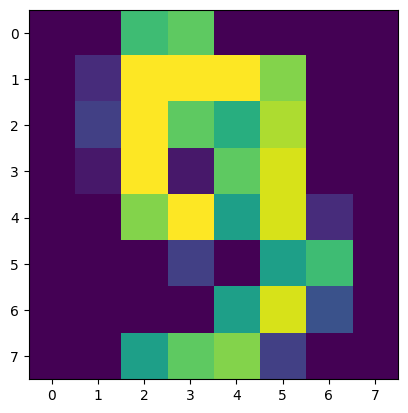

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digit_images = datasets.load_digits()

## The explanatory variables or input data are stored in the .images attribute
## Likewise, the target variable are stored in the .target attribute
print(digit_images.images.shape)
print(digit_images.images[1])

plt.imshow(digit_images.images[9])



## **Pre-process the dataset and split into training and testing**

In [9]:
images = digit_images.images                     ## This is a 3D array of shape (1797, 8, 8)
n_samples = images.shape[0]

input_images = images.reshape(n_samples, -1)    ## We collapse the 3D array into 2D
target = digit_images.target             ## The target output is stored as integer


## Convert the target the target to one-hot encoding
encoded_target = to_categorical(target)


X_train, X_test, y_train, y_test = train_test_split(input_images, encoded_target, 
                                                    test_size=0.3, stratify = encoded_target)


## **Build a basic model multi-class classifier**

In [10]:

# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu
model.add(InputLayer(shape=(64,)))                        # 64 is the number of columns of the image array
model.add(Dense(16, activation = "relu"))

# Output layer with 10 neurons (one per digit) and softmax # We have 10 classes to predict
model.add(Dense(10, activation = "softmax"))

# Compile your model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

## **Testing if we have enough data**

In [27]:
nrows = X_train.shape[0]
training_sizes = np.round([(0.25*nrows), (0.5*nrows), (0.75*nrows), (nrows)]).astype(int)


train_acc = []
test_acc = []
for size in training_sizes:
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]
    early_stop = EarlyStopping(monitor = "loss", patience = 1)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])
    
    train_acc.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_acc.append(model.evaluate(X_test, y_test)[1])   


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8274 - loss: 0.5431 
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.5443 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.5132 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.5064 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8673 - loss: 0.4686 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.4679 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.4346 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8830 - loss: 0.3930 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8860 - loss: 0.4048 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9174 - loss: 0.3378 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.3997 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

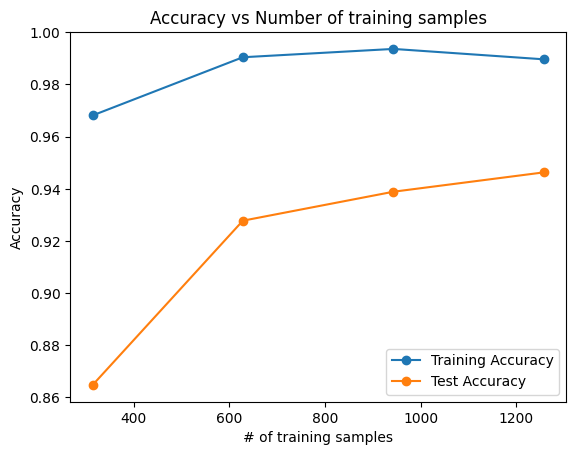

In [36]:
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, "o-", label="Training Accuracy")
    plt.plot(training_sizes, test_accs, "o-", label="Test Accuracy")
    plt.title('Accuracy vs Number of training samples')  
    plt.xlabel("# of training samples")
    plt.ylabel('Accuracy')
    plt.legend(loc="best")  
    plt.show()

    
plot_results(train_acc, test_acc)